Competition

https://www.kaggle.com/c/churn-prediction-the-bridge/data

In [113]:
# carga incial de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import plotly.offline as plt
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.simplefilter('ignore')


In [4]:
# carga de datos
data = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\data\train.csv')
test = pd.read_csv(r'C:\Users\ragod\OneDrive\Escritorio\Trabajo\Proyectos_TB\clasificacion\data\test.csv')

# Analisis y limpieza de train


In [7]:
# vista de variables
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,1,0
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,0,1
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,0,2
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0,3
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,1,4


AttributeError: module 'plotly.offline' has no attribute 'show'

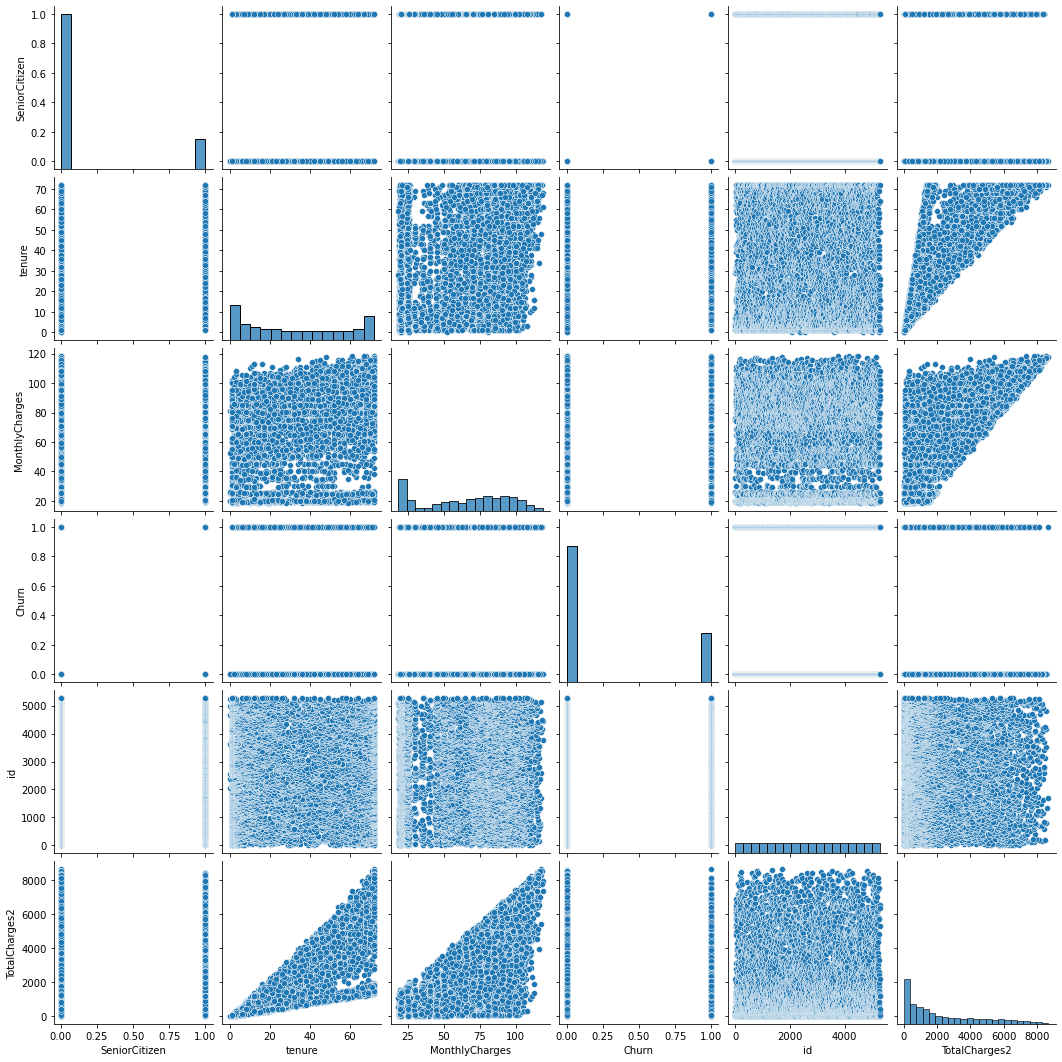

In [114]:
sns.pairplot(data)
plt.show();

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [35]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [23]:
df_num =data.select_dtypes(include=np.number)

In [24]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,Churn,id
0,0,1,25.30,1,0
1,0,7,75.15,0,1
2,0,4,20.05,0,2
3,0,29,76.00,0,3
4,0,3,75.10,1,4
...,...,...,...,...,...
5277,0,1,95.00,1,5277
5278,0,23,91.10,0,5278
5279,0,12,21.15,0,5279
5280,1,12,99.45,1,5280


Analisis de la columna TotalCharges.- Deberia der numerica.

In [76]:
data['TotalCharges2']=pd.to_numeric(data['TotalCharges'], errors ='coerce')

In [77]:
data[data['TotalCharges2'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id,TotalCharges2
2067,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,2067,NaN
2382,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,2382,NaN
2551,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,2551,NaN
3622,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,3622,NaN
4671,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,4671,NaN
4678,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,4678,NaN
4991,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,4991,NaN
5247,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,5247,NaN


In [78]:
# Se cambia valor de TotalCharges a 0 ya que todos tienen menos de un año permanencia

data['TotalCharges2'].fillna(0.00 ,inplace =True)
data[data['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id,TotalCharges2
2067,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,2067,0.0
2382,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,2382,0.0
2551,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,2551,0.0
3622,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,3622,0.0
4671,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,4671,0.0
4678,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,4678,0.0
4991,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,4991,0.0
5247,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,5247,0.0


Analisis de columnas numericas

In [80]:
#Comprobacion duplicados
len(data)==len(data.drop_duplicates())
df2 =data.drop_duplicates()  # elimina los duplicados(filas), tienen que ser exactamente iguales
len(df2),len (data)

(5282, 5282)

In [84]:
#seleccion de numericas para ver: constantes y baja varianza
cte_cols=[]

for c in data.select_dtypes(include=np.number):  # para cada columna en las numericas...
    
    if data[c].std()==0:
        cte_cols.append(c)
        
low_var=[]

for c in data.select_dtypes(include=np.number):  # para cada columna en las numericas...

    minimo=data[c].min()                # minimo de la columna
    per_90=np.percentile(data[c], 90)   # percentil 90, donde residen el 90% de los datos
    
    if per_90==minimo:
        low_var.append(c)
        
        
cte_cols, low_var


([], [])

In [86]:
#busqueda de outliers

stats=data.describe().T

stats['IQR']=stats['75%'] - stats['25%']

outliers=pd.DataFrame(columns=data.columns)

for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5*iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    results=data[(data[e]<lower) | (data[e]>upper)].copy()
    
    results['outliers']=e
    
    outliers=outliers.append(results, sort=True)
    
outliers['outliers'].value_counts()

SeniorCitizen    844
Name: outliers, dtype: int64

,SeniorCitizen,tenure,MonthlyCharges,Churn,id,TotalCharges2
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.159788,32.414237,64.762609,0.263158,2640.500000,2287.210782
std,0.366444,24.489554,30.125932,0.440389,1524.926392,2268.782571
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.450000,0.000000,1320.250000,400.500000
50%,0.000000,29.000000,70.400000,0.000000,2640.500000,1397.475000
75%,0.000000,55.000000,89.850000,1.000000,3960.750000,3814.250000
max,1.000000,72.000000,118.600000,1.000000,5281.000000,8684.800000


In [88]:
#Comprobacion que los outliers son los de valor 1
data[data['SeniorCitizen']==1].count()

customerID          844
gender              844
SeniorCitizen       844
Partner             844
Dependents          844
tenure              844
PhoneService        844
MultipleLines       844
InternetService     844
OnlineSecurity      844
OnlineBackup        844
DeviceProtection    844
TechSupport         844
StreamingTV         844
StreamingMovies     844
Contract            844
PaperlessBilling    844
PaymentMethod       844
MonthlyCharges      844
TotalCharges        844
Churn               844
id                  844
TotalCharges2       844
dtype: int64

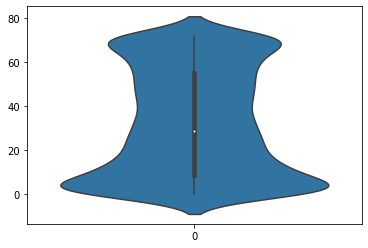

In [121]:
# Variable tenure
df=data

sns.violinplot(data = df.tenure);

In [13]:
# colineales

Analisis de columnas categoricas

In [14]:
# valores unicos

In [15]:
# tabulacion de valores en numeros

Comprobacion del balanceo de datos